AIM :- Loading, Exploring, Preprocessing and Preparing Titanic Dataset

In [1]:
# importing required libraries
import pandas as pd

In [2]:
# Data Collection for experiment
df = pd.read_csv("D:\\5th Sem\\LAB\\ML\\titanic.csv")
# Display the first few rows of the dataset to inspect its structure and content.
print("First 5 rows of the Iris dataset:-\n", df.head())

First 5 rows of the Iris dataset:-
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0           

In [3]:
# Check the dimensions of the dataset (number of rows and columns).
row, col = df.shape
print("No. of rows in the dataset: ", row)
print("No. of column in the dataset: ", col)

No. of rows in the dataset:  891
No. of column in the dataset:  12


In [4]:
# Identify the data types of each column (numeric, categorical, text, etc.).
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
# Preprocess the data to handle missing values, outliers,
# and format it in a way that is suitable for the machine learning algorithms.

# Display the number of missing values in each column
missingValues = df.isnull().sum()
print("Missing values per column:-")
print(missingValues)

Missing values per column:-
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Percentage of missing values
missing_percentage = missingValues[missingValues > 0] / len(df) * 100
print("Missing percentage of columns:\n", missing_percentage)

Missing percentage of columns:
 Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64


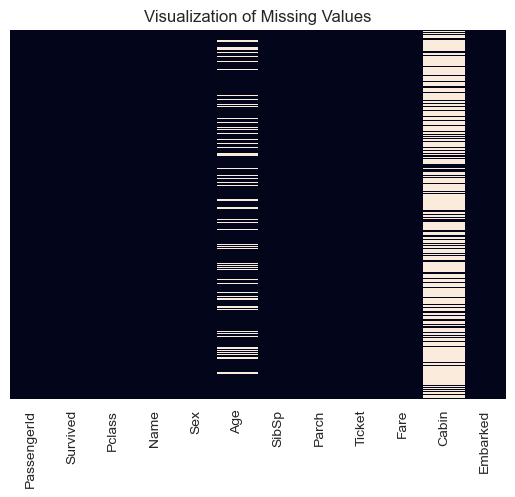

In [7]:
# importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizing the missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.title("Visualization of Missing Values")
plt.show()

In [8]:
# Handling missing values
# Numerical Columns with mean
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [9]:
# Categorical Columns with unknown
categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

In [10]:
# Missing values left after handling
print("Missing Values After Handling:-")
print(df.isnull().sum())

Missing Values After Handling:-
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


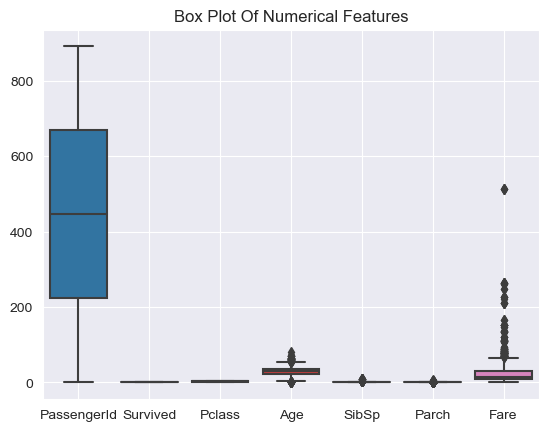

In [11]:
# Visualize the outliers with boxplot
sns.boxplot(data=df[numerical_columns])
plt.title("Box Plot Of Numerical Features")
plt.grid(True)
plt.show()

In [12]:
print("From Box Plot We See that 'Age' and 'Fare' columns contains plenty outliers.")

From Box Plot We See that 'Age' and 'Fare' columns contains plenty outliers.


In [13]:
# Trimming outliers of Fare and Age column
# Define a function to remove outliers using the IQR method
def remove_outliers_IQR(DataFrame, ColumnName, threshold=1.5):
    Q1 = DataFrame[ColumnName].quantile(0.25)
    Q3 = DataFrame[ColumnName].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)
    return DataFrame[(DataFrame[ColumnName] >= lower_bound) & (DataFrame[ColumnName] <= upper_bound)]

In [14]:
# Remove outliers from the Fare and Age columns
df1 = remove_outliers_IQR(df, "Fare")
df1 = remove_outliers_IQR(df1, "Age")

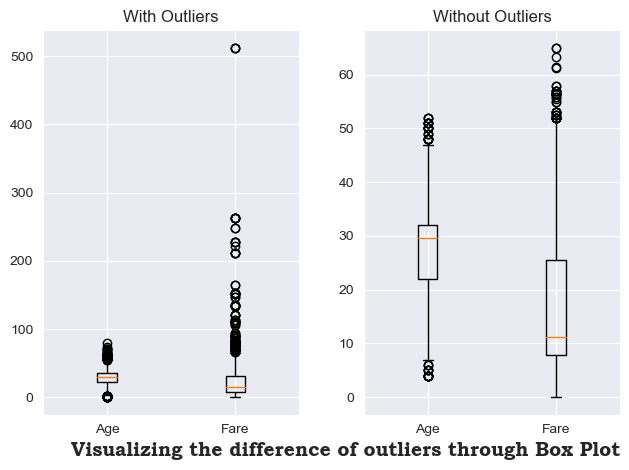

In [15]:
# Visualizing the difference between with and without outliers through boxplot
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the data with outliers in the first subplot
ax1.boxplot(df[["Age", "Fare"]], labels=["Age", "Fare"])
ax1.set_title("With Outliers")

# Plot the data without outliers in the second subplot
ax2.boxplot(df1[["Age", "Fare"]], labels=["Age", "Fare"])
ax2.set_title("Without Outliers")

# Customize the plot
plt.xlabel("Visualizing the difference of outliers through Box Plot",
           loc='right', fontweight='bold', fontname='Bookman Old Style', size=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# Label Encoding
data_encoded_label = df.copy()
print("Categorical columns Before Label Encoding:-\n", data_encoded_label[categorical_columns].head())

Categorical columns Before Label Encoding:-
                                                 Name     Sex  \
0                            Braund, Mr. Owen Harris    male   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                             Heikkinen, Miss. Laina  female   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                           Allen, Mr. William Henry    male   

             Ticket    Cabin Embarked  
0         A/5 21171  Unknown        S  
1          PC 17599      C85        C  
2  STON/O2. 3101282  Unknown        S  
3            113803     C123        S  
4            373450  Unknown        S  


In [17]:
# importing required libraries
from sklearn.preprocessing import LabelEncoder
# Fit the label encoder to the categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    data_encoded_label[column] = label_encoder.fit_transform(data_encoded_label[column])

# Displays the first few rows of the encoded data
print("Categorical columns After Label Encoding:-\n", data_encoded_label[categorical_columns].head())

Categorical columns After Label Encoding:-
    Name  Sex  Ticket  Cabin  Embarked
0   108    1     523    147         2
1   190    0     596     81         0
2   353    0     669    147         2
3   272    0      49     55         2
4    15    1     472    147         2


In [18]:
# importing required libraries
from sklearn.model_selection import train_test_split
# Features and target variable
X = df.drop(columns=['Sex'])  # Features
Y = df['Sex']  # Target Variable
# Split the dataset into training and testing sets(80% training, 20%testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Displaying the type shape and values of holdout datsets
print("Type of X_train dataset:", type(X_train))
print("Shape of X_train dataset:", X_train.shape)
print("Values of X_train dataset:\n", X_train.head())

print("\n\nType of X_test dataset:", type(X_test))
print("Shape of X_test dataset:", X_test.shape)
print("Values of X_test dataset:\n", X_test.head())

print("\n\nType of Y_train dataset:", type(Y_train))
print("Shape of Y_train dataset:", Y_train.shape)
print("Values of Y_train dataset:\n", Y_train.head())

print("\n\nType of Y_test dataset:", type(Y_test))
print("Shape of Y_test dataset:", Y_test.shape)
print("Values of Y_test dataset:\n", Y_test.head())

Type of X_train dataset: <class 'pandas.core.frame.DataFrame'>
Shape of X_train dataset: (712, 11)
Values of X_train dataset:
      PassengerId  Survived  Pclass                                Name   Age  \
331          332         0       1                 Partner, Mr. Austen  45.5   
733          734         0       2          Berriman, Mr. William John  23.0   
382          383         0       3                  Tikkanen, Mr. Juho  32.0   
704          705         0       3             Hansen, Mr. Henrik Juul  26.0   
813          814         0       3  Andersson, Miss. Ebba Iris Alfrida   6.0   

     SibSp  Parch             Ticket     Fare    Cabin Embarked  
331      0      0             113043  28.5000     C124        S  
733      0      0              28425  13.0000  Unknown        S  
382      0      0  STON/O 2. 3101293   7.9250  Unknown        S  
704      1      0             350025   7.8542  Unknown        S  
813      4      2             347082  31.2750  Unknown        